<a href="https://colab.research.google.com/github/xoyeon/hongong-mldl/blob/main/09_3_LSTM%EA%B3%BC_GRU_%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
# LSTM 셀을 사용한 순환층 만들어보기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 컴파일, 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data = (val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 21ms/step - loss: 0.6926 - accuracy: 0.5327 - val_loss: 0.6919 - val_accuracy: 0.5692
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6898 - accuracy: 0.6177 - val_loss: 0.6877 - val_accuracy: 0.6354
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6811 - accuracy: 0.6608 - val_loss: 0.6718 - val_accuracy: 0.6882
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6351 - accuracy: 0.7118 - val_loss: 0.5935 - val_accuracy: 0.7142
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5793 - accuracy: 0.7218 - val_loss: 0.5723 - val_accuracy: 0.7230
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5561 - accuracy: 0.7408 - val_loss: 0.5505 - val_accuracy: 0.7420
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5349 - accuracy: 0.7556 - val_loss: 0.5311 - val_accuracy

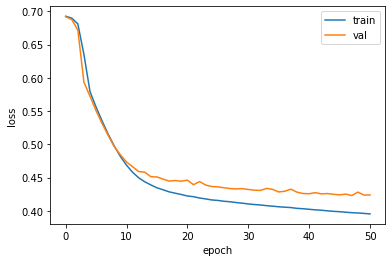

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 순환층에 드롭아웃 적용하기

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoing_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data = (val_seq, val_target),
                     callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.4120 - accuracy: 0.8110 - val_loss: 0.4256 - val_accuracy: 0.8058
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4110 - accuracy: 0.8123 - val_loss: 0.4322 - val_accuracy: 0.8014
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4110 - accuracy: 0.8102 - val_loss: 0.4262 - val_accuracy: 0.8040
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4110 - accuracy: 0.8110 - val_loss: 0.4248 - val_accuracy: 0.8052
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4075 - accuracy: 0.8162 - val_loss: 0.4272 - val_accuracy: 0.8052
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4092 - accuracy: 0.8137 - val_loss: 0.4238 - val_accuracy: 0.8056
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.4073 - accuracy: 0.8126 - val_loss: 0.4285 - val_accuracy:

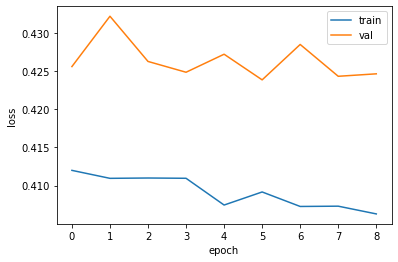

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 2개의 층을 연결하기

In [14]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(50, 16, input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           800       
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,153
Trainable params: 2,153
Non-trainable params: 0
_________________________________________________________________


In [18]:
rmsporp = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 44ms/step - loss: 0.6930 - accuracy: 0.5075 - val_loss: 0.6929 - val_accuracy: 0.5082
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6923 - accuracy: 0.5393 - val_loss: 0.6918 - val_accuracy: 0.5210
Epoch 3/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6879 - accuracy: 0.5485 - val_loss: 0.6813 - val_accuracy: 0.5766
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6727 - accuracy: 0.6003 - val_loss: 0.6688 - val_accuracy: 0.6122
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6669 - accuracy: 0.6027 - val_loss: 0.6647 - val_accuracy: 0.6142
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6628 - accuracy: 0.6076 - val_loss: 0.6600 - val_accuracy: 0.6166
Epoch 7/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6580 - accuracy: 0.6133 - val_loss: 0.6556 - val_ac

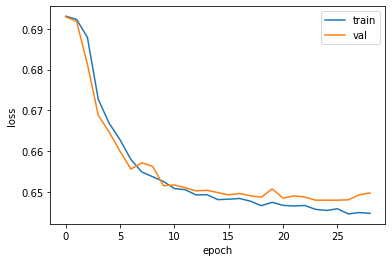

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# GRU 신경망 훈련하기

In [20]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [21]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 21ms/step - loss: 0.6925 - accuracy: 0.5421 - val_loss: 0.6919 - val_accuracy: 0.5480
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6910 - accuracy: 0.5745 - val_loss: 0.6904 - val_accuracy: 0.5682
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6888 - accuracy: 0.5950 - val_loss: 0.6879 - val_accuracy: 0.5822
Epoch 4/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6853 - accuracy: 0.6112 - val_loss: 0.6838 - val_accuracy: 0.5976
Epoch 5/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6794 - accuracy: 0.6246 - val_loss: 0.6769 - val_accuracy: 0.6154
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6694 - accuracy: 0.6391 - val_loss: 0.6651 - val_accuracy: 0.6288
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6519 - accuracy: 0.6581 - val_loss: 0.6437 - val_accuracy:

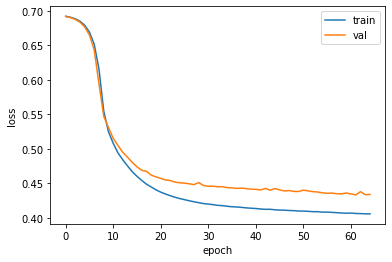

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# LSTM과 GRU 셀로 훈련

In [25]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 15ms/step - loss: 0.6472 - accuracy: 0.6232


[0.6472175717353821, 0.6231600046157837]